# Dynamic Programming

### Train

In [11]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

def DynamicProgramming(env_seed):

    env = gym.make("FrozenLake-v1", desc=env_seed, map_name="12x12", is_slippery=False, render_mode=None)

    V = np.zeros(env.observation_space.n)

    theta = 1e-8 # Threashold value. The lower the number, the more accurate
    gamma = 0.90 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.

    # Find optimal policy
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = V[s]
            # Update value function using Bellman optimality equation
            sumationList = []
            for a in range(env.action_space.n):
                sumation = 0
                for p, ns, r, _ in env.P[s][a]:
                    sumation += p * (r + gamma * V[ns])
                sumationList.append(sumation)
            V[s] = np.max(sumationList)
            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            break

    # Extract optimal policy
    policy = np.zeros(env.observation_space.n, dtype=np.int8)
    for s in range(env.observation_space.n):
        sumationList = []
        for a in range(env.action_space.n):
            sumation = 0
            for p, ns, r, _ in env.P[s][a]:
                sumation+=p * (r + gamma * V[ns])
            sumationList.append(sumation)
        policy[s] = np.argmax([sumationList])

    env.close()

    return policy

size = 12
env_seed = generate_random_map(size=size)
DynamicProgramming_model = DynamicProgramming(env_seed)

### Test

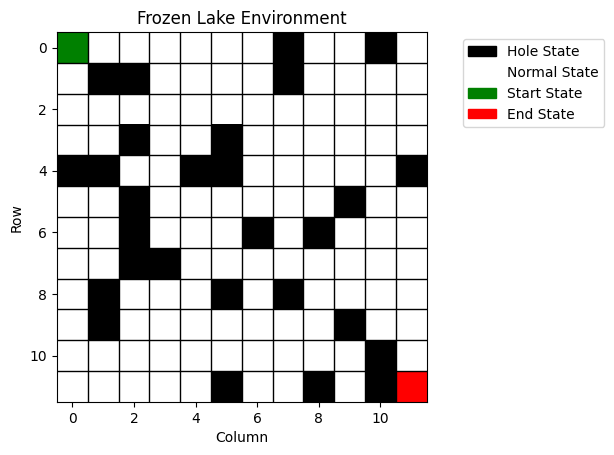

In [12]:
import FrozenLakeFunctions as flf
import imp
imp.reload(flf)

env_array = flf.seeEnv(env_seed, size)

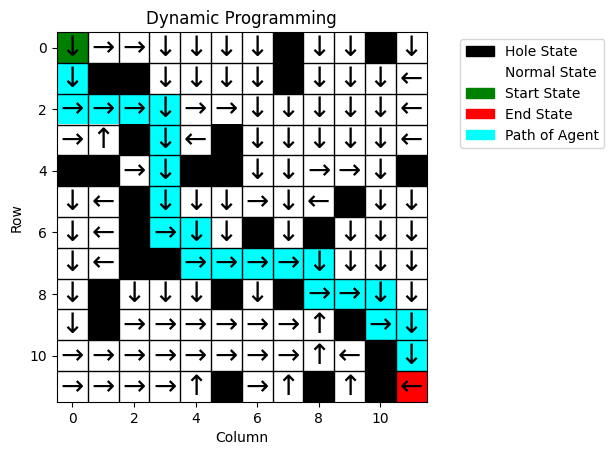

In [13]:
import FrozenLakeFunctions as flf
import imp
imp.reload(flf)

flf.visualize_policy(DynamicProgramming_model, "Dynamic Programming", size, env_array, env_seed)
flf.seeModelState(DynamicProgramming_model, env_seed)